## Spawn Env with LiDAR (Teleop with WASD)

In [1]:
import mujoco,sys
import numpy as np
import matplotlib.pyplot as plt
import time
sys.path.append('../package/helper/')
sys.path.append('../package/mujoco_usage/')
from mujoco_parser import *
from transformation import *
from slider import *
from utility import *

np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo:[%s]"%(mujoco.__version__))

# preprocessed_xml_name = "../xml/scene_experiments_stretch_map_only.xml"
preprocessed_xml_name = "../xml/casa_scenes_transitional_1_site_v3_with_lidar.xml"
mujoco_env = MuJoCoParserClass(name='Tabletop',rel_xml_path=preprocessed_xml_name,verbose=True)
print ("Done.")

render_HZ = 50
render_dt = 1./render_HZ
t_render = time.time()
t_render_prev = time.time()

# Reset
np.random.seed(seed=0)
mujoco_env.reset()

# Loop
mujoco_env.init_viewer(title='None',
                transparent=False,distance=3.0)
# x_pos = 1.0
# y_pos = 1.0
# z_pos = 0.2
x_pos = -1.0
y_pos = -3.5
z_pos = 0.2
initial_point = [x_pos, y_pos, z_pos]
while mujoco_env.is_viewer_alive():
    contact_point = np.zeros((360, 3))
    # mujoco_env.move_free_joint("lidar_joint",[1.0,1.0,1.0])
    # Keyboard handler 
    mujoco_env.move_mocap(initial_point)

    if mujoco_env.is_key_pressed(chars=['A','S','D','W'],upper=True):
        get_char = mujoco_env.get_key_pressed(to_int=False)
        if get_char == 'W':
            x_pos = x_pos + 0.01
        if get_char == 'S':
            x_pos = x_pos - 0.01
        if get_char == 'A':
            y_pos = y_pos + 0.01
        if get_char == 'D':
            y_pos = y_pos - 0.01
    

    if mujoco_env.loop_every(tick_every=10):
        for sensor_idx in range(360):
            sensor_name = 'rangefinder_' + str(sensor_idx)
            sensor_value = mujoco_env.get_sensor_value(sensor_name)
            sensor_R = mujoco_env.get_R_sensor(sensor_name)
            sensor_p = mujoco_env.get_p_sensor(sensor_name)

            direction_world = sensor_R.dot([0, 0, 1])

            if sensor_value[0] < 7 and sensor_value[0] >= 0: # cutoff : 10.0
                contact_point[sensor_idx] = sensor_p + sensor_value[0] * direction_world
                if sensor_value[0] < 0.3:
                    print("reached : ",sensor_idx)

    t_render = time.time()
    if t_render - t_render_prev < render_dt:
        time.sleep(render_dt - (t_render - t_render_prev))

    mujoco_env.step(nstep=mujoco_env.HZ//render_HZ)
    mujoco_env.render()

MuJoCo:[3.1.6]
name:[Tabletop] dt:[0.002] HZ:[500]
n_qpos:[85] n_qvel:[82] n_qacc:[82] n_ctrl:[0]

n_body:[428]
 [0/428] [world] mass:[0.00]kg
 [1/428] [wall_back1_backing_outer_wall_backings_main] mass:[8864.64]kg
 [2/428] [wall_back2_backing_outer_wall_backings_main] mass:[1736.64]kg
 [3/428] [wall_front1_backing_outer_wall_backings_main] mass:[4782.24]kg
 [4/428] [wall_front2_backing_outer_wall_backings_main] mass:[5754.24]kg
 [5/428] [wall_left1_backing_outer_wall_backings_main] mass:[4847.04]kg
 [6/428] [wall_left2_backing_outer_wall_backings_main] mass:[2643.84]kg
 [7/428] [wall_right1_backing_outer_wall_backings_main] mass:[4587.84]kg
 [8/428] [wall_right2_backing_outer_wall_backings_main] mass:[2643.84]kg
 [9/428] [wall1_backing_inner_wall_backings_main] mass:[3291.84]kg
 [10/428] [wall2_backing_inner_wall_backings_main] mass:[3291.84]kg
 [11/428] [wall3_backing_inner_wall_backings_main] mass:[2643.84]kg
 [12/428] [bedroom_door_backing_door_wall_backings_main] mass:[176.00]kg
 

## Just Scan Env with Parameters (Only Scan, Not Generate Map)

<span style="color:orange;font-size: 20px;font-weight:light;"> Ensure that the LiDAR remains only inside the 3D environment as it moves around </span>

MuJoCo:[3.1.6]
name:[Tabletop] dt:[0.002] HZ:[500]
n_qpos:[85] n_qvel:[82] n_qacc:[82] n_ctrl:[0]

n_body:[428]
 [0/428] [world] mass:[0.00]kg
 [1/428] [wall_back1_backing_outer_wall_backings_main] mass:[8864.64]kg
 [2/428] [wall_back2_backing_outer_wall_backings_main] mass:[1736.64]kg
 [3/428] [wall_front1_backing_outer_wall_backings_main] mass:[4782.24]kg
 [4/428] [wall_front2_backing_outer_wall_backings_main] mass:[5754.24]kg
 [5/428] [wall_left1_backing_outer_wall_backings_main] mass:[4847.04]kg
 [6/428] [wall_left2_backing_outer_wall_backings_main] mass:[2643.84]kg
 [7/428] [wall_right1_backing_outer_wall_backings_main] mass:[4587.84]kg
 [8/428] [wall_right2_backing_outer_wall_backings_main] mass:[2643.84]kg
 [9/428] [wall1_backing_inner_wall_backings_main] mass:[3291.84]kg
 [10/428] [wall2_backing_inner_wall_backings_main] mass:[3291.84]kg
 [11/428] [wall3_backing_inner_wall_backings_main] mass:[2643.84]kg
 [12/428] [bedroom_door_backing_door_wall_backings_main] mass:[176.00]kg
 

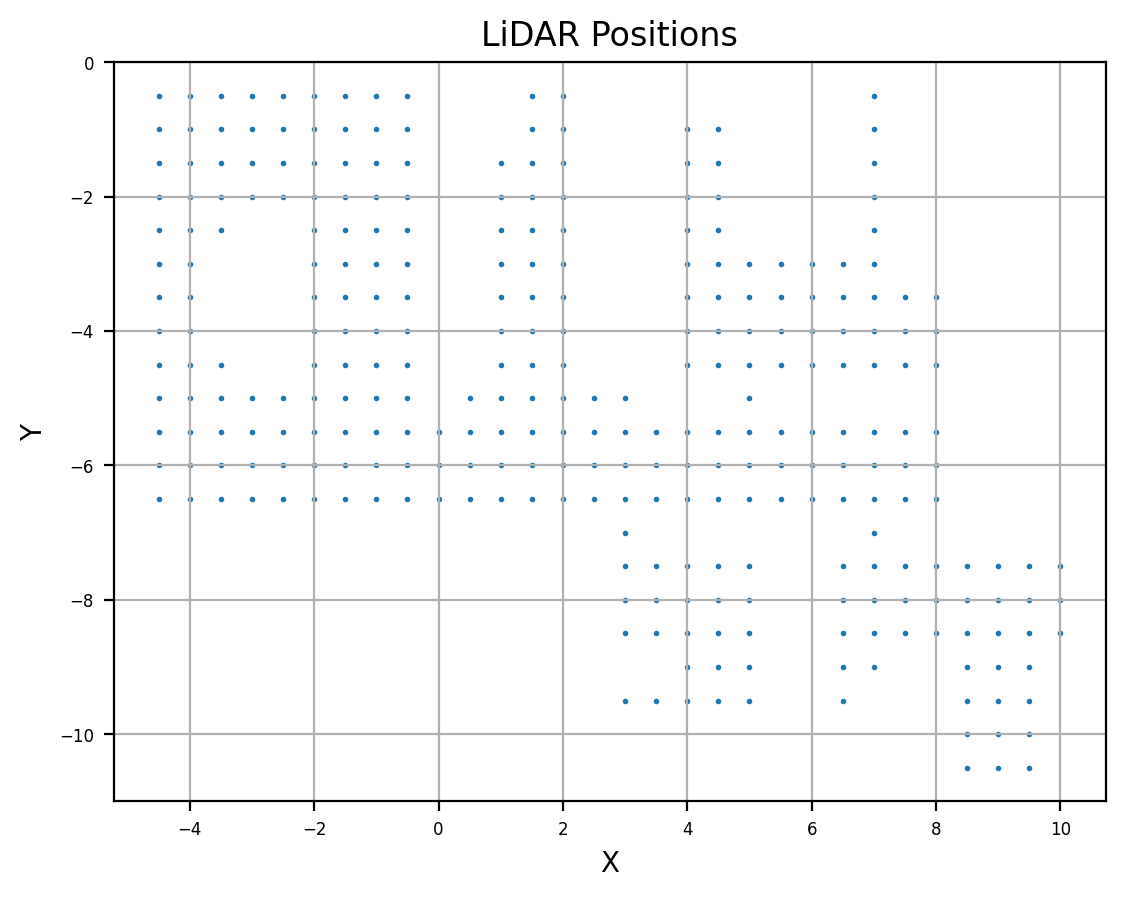

: 

In [2]:
import mujoco,sys
import numpy as np
import matplotlib.pyplot as plt
import time
sys.path.append('../package/helper/')
sys.path.append('../package/mujoco_usage/')
from mujoco_parser import *
from transformation import *
from slider import *
from utility import *

np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo:[%s]"%(mujoco.__version__))

preprocessed_xml_name = "../xml/casa_scenes_transitional_1_site_v3_with_lidar.xml"
mujoco_env = MuJoCoParserClass(name='Tabletop',rel_xml_path=preprocessed_xml_name,verbose=True)
print ("Done.")

render_HZ = 50
render_dt = 1./render_HZ
t_render = time.time()
t_render_prev = time.time()

# Reset
np.random.seed(seed=0)
mujoco_env.reset()

# Loop
mujoco_env.init_viewer(title='Lidar Auto-Scan',
                transparent=False,distance=3.0)

x_pos = -1.0
y_pos = -3.5
z_pos = 0.1

initial_point = [x_pos, y_pos, z_pos]
directions = np.array([[1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0]])
expanded_points = set()
expanded_points.add(tuple(initial_point))

def is_accessible(target, pcd_array, radius):
    distances = np.linalg.norm(pcd_array - target, axis=1, ord=1)
    inside_circle = pcd_array[distances <= radius]
    if len(inside_circle) == 0:
        return True
    else:
        return False

# 확장 함수
def expand_points(point, env, resolution, detection_distance, directions):
    new_points = set()
    for direction in directions:
        new_point = point + resolution * direction
        mujoco_env.move_mocap(new_point)
        # if is_accessible(new_point, env, radius):
        env.step(nstep=mujoco_env.HZ//render_HZ)
        env.render()

        is_empty = True
        for sensor_idx in range(360):
            sensor_name = 'rangefinder_' + str(sensor_idx)
            sensor_value = mujoco_env.get_sensor_value(sensor_name)
            sensor_R = mujoco_env.get_R_sensor(sensor_name)
            sensor_p = mujoco_env.get_p_sensor(sensor_name)

            direction_world = sensor_R.dot([0, 0, 1])

            if sensor_value[0] < 7 and sensor_value[0] >= 0: # cutoff : 10.0
                contact_point[sensor_idx] = sensor_p + sensor_value[0] * direction_world
                if sensor_value[0] < detection_distance:
                    # print("reached : ",sensor_idx)
                    is_empty = False
        
        if is_empty: 
            new_points.add(tuple(new_point))

    return new_points

ROBOT_RADIUS = 0.4
FEASIBLE_RESOLUTION = 0.5
DETECTION_DISTANCE = 0.2
# points_xy_array = 
current_points = {tuple(initial_point)}

mujoco_env.move_mocap(initial_point)
while mujoco_env.is_viewer_alive():
    contact_point = np.zeros((360, 3))
    # mujoco_env.move_free_joint("lidar_joint",[1.0,1.0,1.0])
    # Keyboard handler 
    

    start_time = time.time()
    while current_points:
        new_points = set()
        for point in current_points:
            expanded = expand_points(np.array(point), mujoco_env, FEASIBLE_RESOLUTION, DETECTION_DISTANCE, directions)
            new_points.update(expanded)
        current_points = new_points - expanded_points
        expanded_points.update(current_points)
        current_time = time.time()
        if current_time - start_time >= 1:
            print("expanded_points : ", len(expanded_points))
            start_time = current_time 
    mujoco_env.close_viewer()
    
# 결과 배열로 변환
feasible_positions = np.array(list(expanded_points))

import matplotlib.pyplot as plt
# x, y 값 분리
x = feasible_positions[:, 0]
y = feasible_positions[:, 1]
# 2D 플롯
plt.scatter(x, y, s=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LiDAR Positions')
plt.grid(True)
plt.show()

## Scan Env with LiDAR (Generate Map)

In [ ]:
import open3d as o3d
import mujoco,sys
import numpy as np
import matplotlib.pyplot as plt
import time
sys.path.append('../package/helper/')
sys.path.append('../package/mujoco_usage/')
from mujoco_parser import *
from transformation import *
from slider import *
from utility import *

np.set_printoptions(precision=2,suppress=True,linewidth=100)
plt.rc('xtick',labelsize=6); plt.rc('ytick',labelsize=6)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
print ("MuJoCo:[%s]"%(mujoco.__version__))

preprocessed_xml_name = "../xml/casa_scenes_transitional_1_site_v3_with_lidar.xml"
mujoco_env = MuJoCoParserClass(name='Tabletop',rel_xml_path=preprocessed_xml_name,verbose=True)

# Point cloud 데이터 초기화
point_cloud = o3d.geometry.PointCloud()

def update_map(new_points):
    global point_cloud
    # 새로운 포인트 데이터를 numpy array로 변환
    np_points = np.array(new_points)

    # 기존 point cloud에 새로운 포인트 추가
    point_cloud.points.extend(o3d.utility.Vector3dVector(np_points))

    # 중복 포인트 제거 (voxel downsampling 사용)
    voxel_size = 0.05
    point_cloud = point_cloud.voxel_down_sample(voxel_size=voxel_size)

    return point_cloud

print ("Done.")

render_HZ = 50
render_dt = 1./render_HZ
t_render = time.time()
t_render_prev = time.time()

# Reset
np.random.seed(seed=0)
mujoco_env.reset()

# Loop
mujoco_env.init_viewer(title='Lidar Auto-Scan',
                transparent=False,distance=3.0)

x_pos = -1.0
y_pos = -3.5
z_pos = 0.1

initial_point = [x_pos, y_pos, z_pos]
directions = np.array([[1, 0, 0], [-1, 0, 0], [0, 1, 0], [0, -1, 0]])
expanded_points = set()
expanded_points.add(tuple(initial_point))

def is_accessible(target, pcd_array, radius):
    distances = np.linalg.norm(pcd_array - target, axis=1, ord=1)
    inside_circle = pcd_array[distances <= radius]
    if len(inside_circle) == 0:
        return True
    else:
        return False

# 확장 함수
def expand_points(point, env, resolution, detection_distance, directions, point_cloud):
    new_points = set()
    for direction in directions:
        new_point = point + resolution * direction
        mujoco_env.move_mocap(new_point)
        # if is_accessible(new_point, env, radius):
        env.step(nstep=mujoco_env.HZ//render_HZ)
        env.render()

        is_empty = True
        for sensor_idx in range(360):
            sensor_name = 'rangefinder_' + str(sensor_idx)
            sensor_value = mujoco_env.get_sensor_value(sensor_name)
            sensor_R = mujoco_env.get_R_sensor(sensor_name)
            sensor_p = mujoco_env.get_p_sensor(sensor_name)

            direction_world = sensor_R.dot([0, 0, 1])

            if sensor_value[0] < 7 and sensor_value[0] >= 0: # cutoff : 10.0
                contact_point[sensor_idx] = sensor_p + sensor_value[0] * direction_world
                if sensor_value[0] < detection_distance:
                    # print("reached : ",sensor_idx)
                    is_empty = False
        # 맵 업데이트
        point_cloud = update_map(contact_point)
        
        if is_empty: 
            new_points.add(tuple(new_point))

    return new_points, point_cloud

ROBOT_RADIUS = 0.4
FEASIBLE_RESOLUTION = 0.5
DETECTION_DISTANCE = 0.2
# points_xy_array = 
current_points = {tuple(initial_point)}

mujoco_env.move_mocap(initial_point)
while mujoco_env.is_viewer_alive():
    contact_point = np.zeros((360, 3))
    # mujoco_env.move_free_joint("lidar_joint",[1.0,1.0,1.0])
    # Keyboard handler 
    

    start_time = time.time()
    while current_points:
        new_points = set()
        for point in current_points:
            expanded, point_cloud = expand_points(np.array(point), mujoco_env, FEASIBLE_RESOLUTION, DETECTION_DISTANCE, directions, point_cloud)
            new_points.update(expanded)
        current_points = new_points - expanded_points
        expanded_points.update(current_points)
        current_time = time.time()
        if current_time - start_time >= 1:
            print("expanded_points : ", len(expanded_points))
            start_time = current_time 
    mujoco_env.close_viewer()
    
# 결과 배열로 변환
feasible_positions = np.array(list(expanded_points))

import matplotlib.pyplot as plt
# x, y 값 분리
x = feasible_positions[:, 0]
y = feasible_positions[:, 1]
# 2D 플롯
plt.scatter(x, y, s=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LiDAR Positions')
plt.grid(True)
plt.show()

In [7]:
from datetime import datetime
import os
now = datetime.now()
# pointcloud_name =preprocessed_xml_name.replace(".xml", "")
# pointcloud_name = preprocessed_xml_name.split('../xml/')[1]
pointcloud_name = preprocessed_xml_name.replace('../xml/','')
pointcloud_name = pointcloud_name.replace('.xml','')
pointcloud_name = pointcloud_name.replace("/", "_") + now.strftime("_%Y%m%d_%H%M%S") + ".ply"
pointcloud_file_path = "./point_cloud/" + pointcloud_name

directory = os.path.dirname(pointcloud_file_path)
if not os.path.exists(directory):
    os.makedirs(directory)
o3d.io.write_point_cloud(pointcloud_file_path, point_cloud)

True

In [8]:
import open3d as o3d

# Specify the file path
file_path = pointcloud_file_path

# Load the point cloud data
loaded_point_cloud = o3d.io.read_point_cloud(file_path)

# Print some information about the loaded point cloud
print(f"Loaded point cloud with {len(loaded_point_cloud.points)} points")
def close_visualizer(vis):
    vis.destroy_window()

# Create a visualizer
vis = o3d.visualization.VisualizerWithKeyCallback()
vis.create_window()
vis.add_geometry(loaded_point_cloud)
vis.register_key_callback(ord('Q'), close_visualizer)
vis.register_key_callback(ord('q'), close_visualizer)
vis.run()
vis.destroy_window()

Loaded point cloud with 3745 points
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display
[Open3D WARNING] GLFW Error: Cocoa: Failed to find service port for display


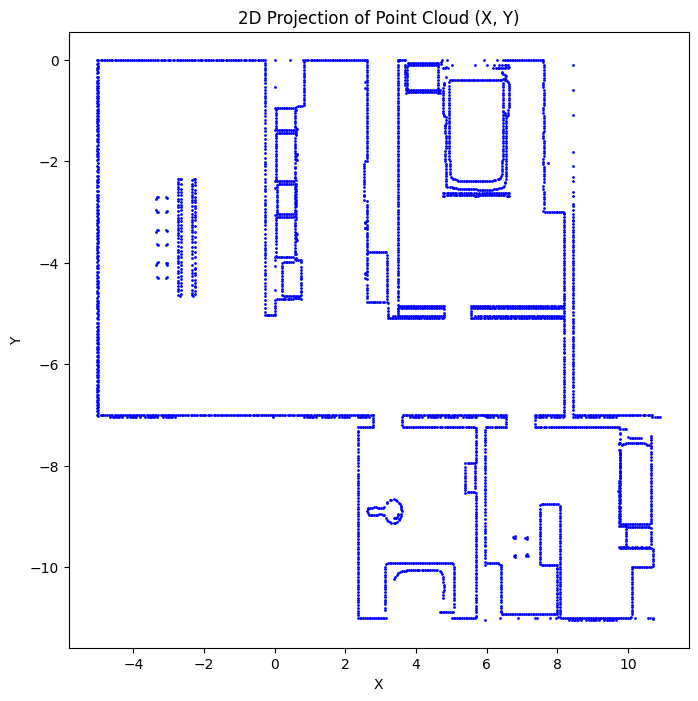

In [2]:
import matplotlib.pyplot as plt
import open3d as o3d

# Specify the file path
file_path = "point_cloud/casa_scenes_transitional_1_site_v3_with_lidar_20241016_141716.ply"

# Load the point cloud data
loaded_point_cloud = o3d.io.read_point_cloud(file_path)

points = loaded_point_cloud.points
# Separate X, Y (ignore Z)
x_vals = [point[0] for point in points]
y_vals = [point[1] for point in points]

# Plot the XY points in a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x_vals, y_vals, s=1, c='b')  # s=1 for point size, c='b' for blue color
plt.title('2D Projection of Point Cloud (X, Y)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()